In [1]:
import pandas as pd

# Загрузка данных
data = pd.read_csv("Admission_Predict_Ver1.1.csv")

data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [2]:
# Число пропусков
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [3]:
# Целевой признак
target = "Chance of Admit"

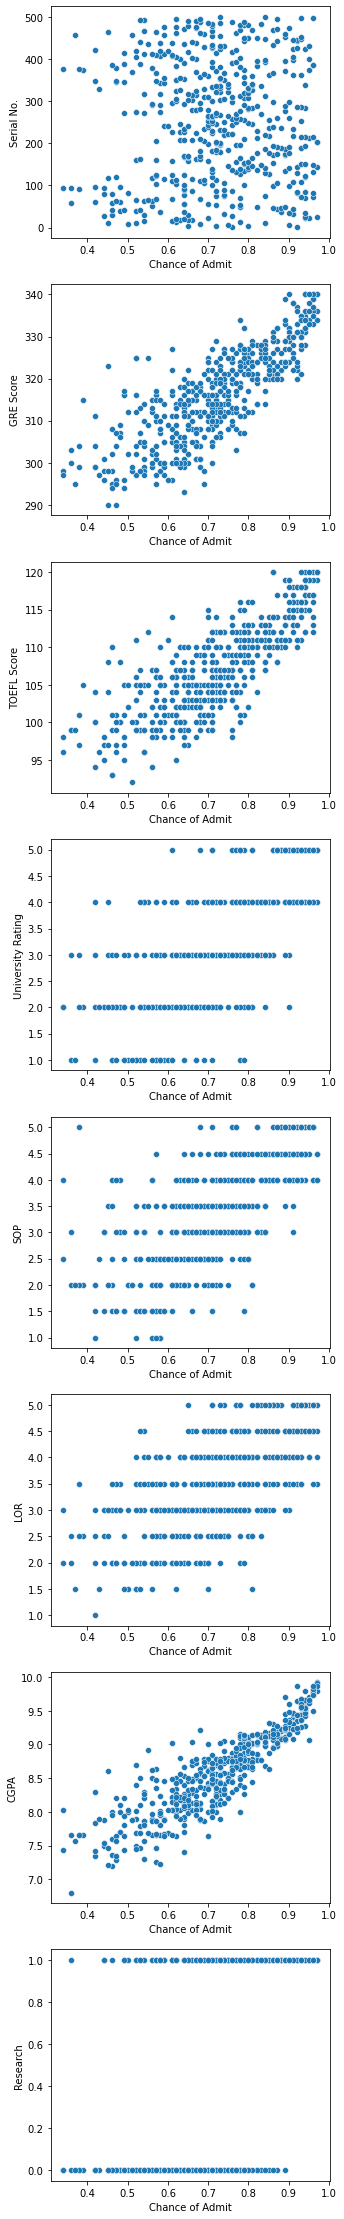

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from math import sqrt

fix, axs = plt.subplots(data.shape[1] - 1, figsize=(5, (data.shape[1] - 1) * 5))

for i, col in enumerate(data.columns):
  if col != target:
    sb.scatterplot(x=target, y=col, data=data, ax=axs[i])

# Violin plot

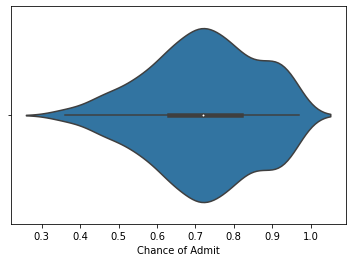

In [5]:
sb.violinplot(x=data["Chance of Admit"]);

# Корреляционный анализ

In [6]:
corr = data.corr()
corr

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


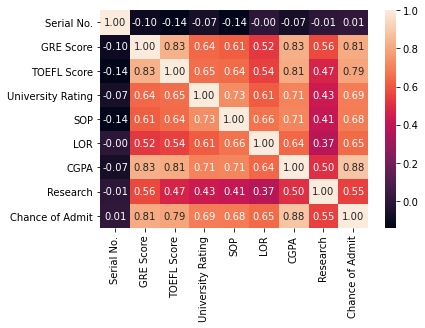

In [7]:
sb.heatmap(corr, annot=True, fmt=".2f");

# Вывод


In [8]:
from IPython.display import Markdown

def corr_values(series, feature):
  for k, v in series[feature].iteritems():
    if k != feature:
      yield (k, v)

good_features = [
  k
  for k, v in corr_values(corr, target)
  if v > 0.5
]

bad_features = [
  k
  for k, v in corr_values(corr, target)
  if v < 0.5
]

display(
  Markdown(f"- Хорошо коррелируют с целевым признаком ({target})): {', '.join(good_features)}"),
  Markdown(f"- Плохо коррелируют с целевым признаком ({target})): {', '.join(bad_features)}")
)

- Хорошо коррелируют с целевым признаком (Chance of Admit)): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research

- Плохо коррелируют с целевым признаком (Chance of Admit)): Serial No.

- Линейно зависимых признаков с высоким коэффициентом корреляции не обнаружено
- Построить модель можно после удаления лишних признаков